# With quantstats

We support and recommend [quantstats](https://github.com/ranaroussi/quantstats)

In [1]:
import pandas as pd
pd.options.plotting.backend = "plotly"

import quantstats as qs

from cvx.simulator.portfolio import build_portfolio
from cvx.simulator.metrics import Metrics

import matplotlib.font_manager

In [2]:
prices=pd.read_csv("data/stock_prices.csv", header=0, index_col=0, parse_dates=True) 
prices

,GOOG,AAPL,FB,BABA,AMZN,GE,AMD,WMT,BAC,GM,T,UAA,SHLD,XOM,RRC,BBY,MA,PFE,JPM,SBUX
date,,,,,,,,,,,,,,,,,,,,
2017-01-03,786.140015,113.847588,116.860001,88.599998,753.669983,30.404533,11.43,66.533134,22.096642,33.415901,39.866150,29.870001,9.72,86.670731,32.429317,41.446667,104.299248,31.459467,84.413986,54.048016
2017-01-04,786.900024,113.720169,118.690002,90.510002,757.179993,30.414125,11.43,66.920738,22.508562,35.260189,39.634476,30.540001,10.36,85.717155,33.374344,42.425648,105.288902,31.735929,84.569679,54.672962
2017-01-05,794.020020,114.298470,120.669998,94.370003,780.450012,30.241426,11.24,67.066093,22.243753,34.594723,39.523277,30.290001,10.39,84.439362,34.020943,41.330357,106.102089,32.040993,83.791222,55.131905
2017-01-06,806.150024,115.572701,123.410004,93.889999,795.989990,30.327776,11.32,66.145531,22.243753,34.214458,38.735809,30.469999,9.56,84.391678,34.050785,41.456364,106.865707,31.917057,83.800941,55.786144
2017-01-09,806.650024,116.631287,124.900002,94.720001,796.919983,30.183859,11.49,66.581581,22.116253,34.233471,38.248329,30.469999,9.10,82.999451,32.588478,42.008858,106.657455,31.907528,83.859329,56.830975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-05,1027.810059,172.800003,159.339996,172.570007,1451.750000,13.430000,10.02,87.809998,30.320000,38.000000,35.632843,17.469999,2.97,76.019997,14.520000,72.120003,175.550003,35.730000,111.879997,59.139999
2018-04-06,1007.039978,168.380005,157.199997,167.520004,1405.229980,13.060000,9.61,86.690002,29.629999,37.680000,35.130001,16.980000,2.88,74.870003,13.970000,70.489998,169.699997,35.169998,109.089996,58.340000
2018-04-09,1015.450012,170.050003,157.929993,169.869995,1406.079956,12.830000,9.53,86.279999,29.870001,37.830002,35.169998,16.639999,2.82,74.870003,13.930000,69.820000,170.339996,35.459999,110.400002,58.700001


In [3]:
capital = 1e6

In [4]:
portfolio = build_portfolio(prices=prices, initial_cash=capital)

In [5]:
for before, now, state in portfolio:
    # each day we invest a quarter of the capital in the assets
    portfolio[now] = 0.05 * state.nav / state.prices

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


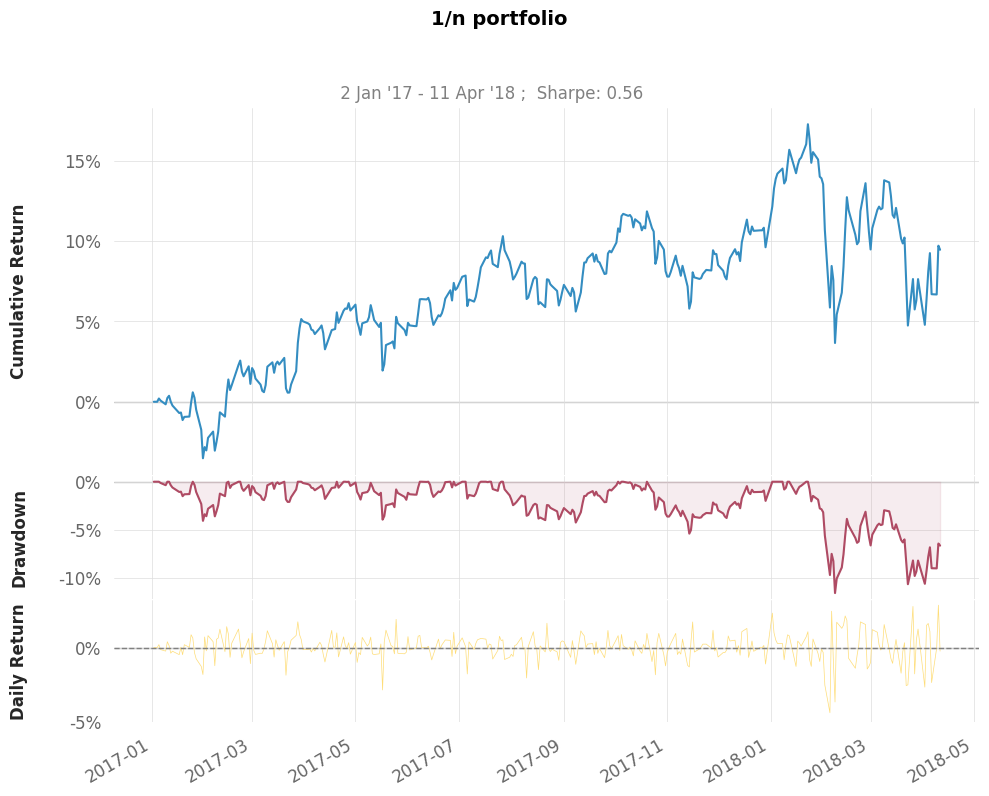

0.5646278826409189
0.5655105330739049
0.5646278826409189


In [6]:
qs.plots.snapshot(portfolio.nav, title="1/n portfolio")

# show sharpe ratio
print(qs.stats.sharpe(portfolio.nav.pct_change()))
print(qs.stats.sharpe(portfolio.nav.pct_change().dropna()))
print(qs.stats.sharpe(portfolio.nav))